## Data representation

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
print('images shape: {}'.format(digits.images.shape))
print('targets shape: {}'.format(digits.target.shape))

images shape: (1797, 8, 8)
targets shape: (1797,)


Ground truth: 0


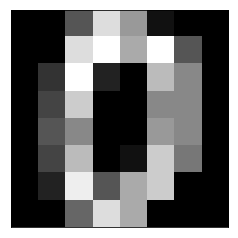

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.images[0], cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
print( 'Ground truth: {}'.format(digits.target[0]))

## Prepare data

In [4]:
X = digits.data.reshape(-1,64)
print(X.shape)

(1797, 64)


In [5]:
y = digits.target
print(y.shape)

(1797,)


In [6]:
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


## Dimensionality reduction and Manifold learning

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)

In [9]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
X_pca=pca.transform(X)

In [11]:
print(X.shape)

(1797, 64)


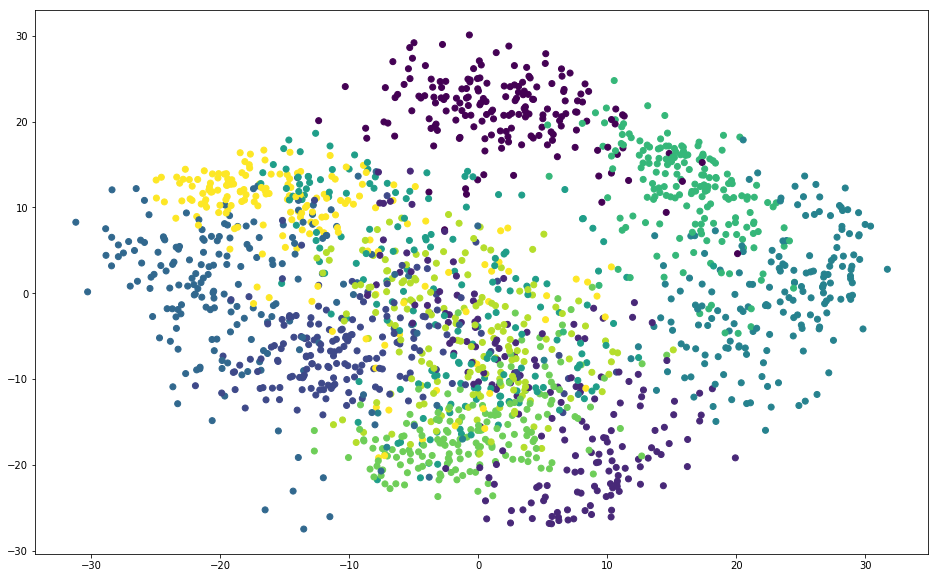

In [12]:
plt.figure(figsize=(16,10))
plt.scatter(X_pca[:,0],X_pca[:,1], c=y)

In [13]:
print(pca.mean_.shape)
print(pca.components_.shape)

(64,)
(2, 64)


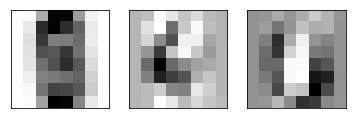

In [29]:
fig, ax = plt.subplots(1,3)
ax[0].matshow(pca.mean_.reshape(8,8),cmap=plt.cm.Greys)
ax[1].matshow(pca.components_[0,:].reshape(8,8), cmap=plt.cm.Greys)
ax[2].matshow(pca.components_[1,:].reshape(8,8), cmap=plt.cm.Greys)
for i in range(3):
    ax[i].set_xticks(())
    ax[i].set_yticks(())

## Isomap

In [30]:
from sklearn.manifold import Isomap
# 流形降维， pca只能线性降维
isomap = Isomap(n_components=2, n_neighbors=20)
isomap.fit(X)
X_isomap = isomap.transform(X)
X_isomap.shape

(1797, 2)

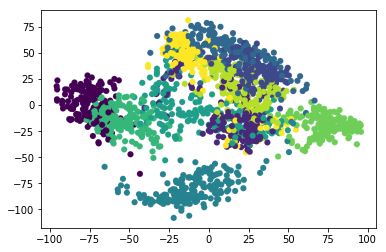

In [38]:
plt.scatter(X_isomap[:,0],X_isomap[:,1],c=y, linewidths=0.1)

## Classification

In [39]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

C:\Users\sunqu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (1347, 64)
X_test shape: (450, 64)
y_train shape: (1347,)
y_test shape: (450,)


In [42]:
from sklearn.svm import LinearSVC

In [43]:
svm = LinearSVC()

In [44]:
svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [45]:
svm.predict(X_train)

array([2, 8, 9, ..., 7, 7, 8])

In [46]:
svm.score(X_train, y_train)

0.9933184855233853

In [47]:
svm.score(X_test, y_test)

0.9266666666666666

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_train,y_train)

0.9992576095025983

In [50]:
rf.score(X_test, y_test)

0.9488888888888889

## Model Selection

In [52]:
import numpy as np
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(rf, X_train, y_train, cv=5)
print("scores:%s mean:%f std:%f" % (str(scores), np.mean(scores), np.std(scores)))

scores:[0.89781022 0.92250923 0.95202952 0.917603   0.92424242] mean:0.922839 std:0.017367


In [53]:
rf2 = RandomForestClassifier(n_estimators=50)
scores = cross_val_score(rf2, X_train, y_train, cv=5)
print('scores:%s mean:%f std:%f' % (str(scores), np.mean(scores), np.std(scores)))

scores:[0.97080292 0.95940959 0.96678967 0.97003745 0.97727273] mean:0.968862 std:0.005823


## Grid Search

In [54]:
from sklearn.grid_search import GridSearchCV

C:\Users\sunqu\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [57]:
param_grid = {'C':10. ** np.arange(-3,4)}
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=3, verbose=3)

In [58]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.951327 -   0.0s
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.966592 -   0.0s
[CV] C=0.001 .........................................................
[CV] ................................ C=0.001, score=0.970852 -   0.0s
[CV] C=0.01 ..........................................................
[CV] ................................. C=0.01, score=0.951327 -   0.0s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=0.01, score=0.957684 -   0.0s
[CV] C=0.01 ..........................................................
[CV] ................................. C=0.01, score=0.959641 -   0.0s
[CV] C=0.1 ...........................................................
[CV] .................................. C=0.1, score=0.951327 -   0.0s
[CV] C=0.1 ...........................................................
[CV] .................................. C=0.1, score=0.946548 -   0.0s
[CV] C=0.1 ...........................................................
[CV] .................................. C=0.1, score=0.950673 -   0.0s
[CV] C=1.0 ...........................................................
[CV] .................................. C=1.0, score=0.942478 -   0.0s
[CV] C=1.0 ...........................................................
[CV] .................................. C=1.0, score=0.939866 -   0.0s
[CV] C=1.0 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.4s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [59]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.001}
0.9628804751299184
